In [17]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
%matplotlib inline

### Generating the Data

In [18]:
# A simple function generating data of predictors and responses!
def gen_data(filename='kc_house_data.csv', limit=10):
    
    #Total features to use
    n = 2
    
    #Reading the data from csv
    data = np.genfromtxt('kc_house_data.csv', delimiter=',')
    
    #Reading two features bedrooms and sqft_living
    features = data[1:limit+1, [5,3]]
        
    #Adding constant feature x0
    x = np.hstack((np.ones((limit, 1)), features))
    
    #Reading the predicting variable - price 
    y = data[1:limit+1, 2]
    y = y.reshape(len(y), 1)
    
    return x, y, n

### Normalization Function - Calculation

In [19]:
def calculate_normalized(feature):
    
    res = np.subtract(feature, np.mean(feature))
    range_feature = np.max(feature)-np.min(feature)
    res = np.divide(res, range_feature)
    
    return res

### Normalization Function - Wrapper

In [20]:
def normalize(x, y):
    
    #x.shape[1] = no. of columns = no, features
    #starting from 1 to skip constant feature
    for i in range(1, x.shape[1]):
        x[:, i] = calculate_normalized(x[:, i])
    
    #normalizing prediction variable  
    y = calculate_normalized(y)
    
    return x, y


### Hypothesis Function

In [21]:
def calculate_hypothesis(x, params):
    
    h_of_x = np.dot(x, params)
    
    return h_of_x

### Cost Function 

In [22]:
def cost_function(x, y, params):
    
    #Total training examples
    m = len(y)
    
    #Calculating hypothesis (predictions)
    h = calculate_hypothesis(x, params)
    
    #Calculating cost
    diff = np.subtract(h, y)
    squared_sum = np.sum(np.square(diff))
    cost = np.divide(squared_sum, m*2)
        
    return cost

### Function to calculate Sum of Errors (formula) 

In [23]:
def calculate_sum_of_errors(x, y, params, xi):
    
    xi = xi.reshape(len(xi), 1)
    
    #hypothesis h(x)
    h_of_x = calculate_hypothesis(x, params)
        
    #performing calculations
    diff = np.subtract(h_of_x, y)
    res = np.multiply(diff, xi)
    sum_of_errors = np.sum(res)

    return sum_of_errors

### Gradient Descent Function

In [24]:
def gradient_descent(x, y, params, alpha=0.001, precision=0.01, iterations = 1000):
    
    #Total count of training exmaples and features
    m = len(y)
    n = len(params)
    
    #Creating a list for storing our cost function history
    cost_history = list()
    
    #Creating a vector for storing our parameter caches
    parameterCaches = np.zeros((n, 1))
    
    first_iteration = True
    its = 0
    
    while True:
        
        #Caching the new parameters for simultaneous update
        for j in range(0, n):
            parameterCaches[j] = params[j] - alpha*(1/m)*calculate_sum_of_errors(x, y, params, x[:, j])
        
        #Fail-safe
        if(sum(1 for val in parameterCaches if val < 0) >0):
            print("Fail safe activated")
            break
        
        #Updating the parameters simultaneously
        for j in range(0, n):
            params[j] = parameterCaches[j]
        
        #Keeping track of the history of cost
        current_cost = cost_function(x, y, params)
        
#         print("theta0 = {} | theta1 = {} | theta2 = {} | cost = {} | iterations = {}".format(params[0],params[1],params[2], current_cost, its))
#         print()
        
        if not(first_iteration) and ((cost_history[-1] - current_cost) <= precision):
            print("Precision naileddd!")
            break
                
        if first_iteration:
            first_iteration = False
        
        cost_history.append(current_cost)
        
        its +=1
        
        if its == iterations:
            break
            
    return params, cost_history, its
    

In [25]:
x, y, n = gen_data(limit=100)
params = np.ones((n+1, 1)) #theta0 theta1 theta2

In [26]:
#x, y = normalize(x, y)

Text(0,0.5,'price')

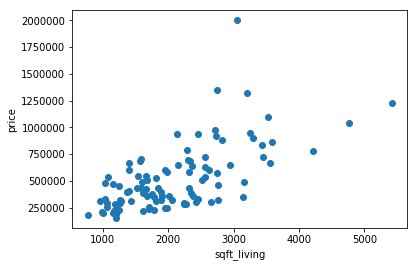

In [27]:
plt.scatter(x[:, 1], y)
plt.xlabel("sqft_living")
plt.ylabel("price")

Text(0,0.5,'price')

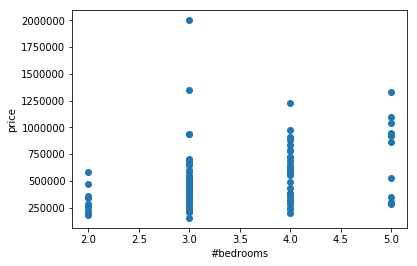

In [28]:
plt.scatter(x[:, 2], y)
plt.xlabel("#bedrooms")
plt.ylabel("price")

In [29]:
params = np.ones((n+1, 1)) #theta0 theta1 theta2
params, cost_hist, its = gradient_descent(x, y, params, alpha=0.000000001, precision= 0.0000001)

### Cost History against iterations

Text(0,0.5,'Cost')

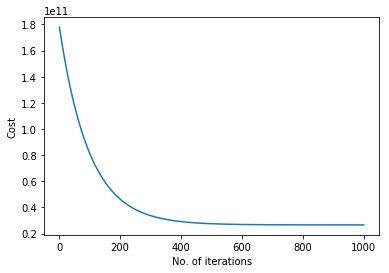

In [30]:
cost_hist = np.array(cost_hist)
iterations = np.arange(1, its+1)

plt.plot(iterations, cost_hist)
plt.xlabel("No. of iterations")
plt.ylabel("Cost")

In [31]:
print("theta0 = {} | theta1 = {} | theta2 = {}".format(params[0], params[1], params[2]))

theta0 = [1.10528607] | theta1 = [244.42942627] | theta2 = [1.36749803]


Text(0,0.5,'Price')

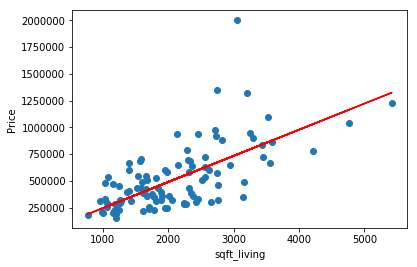

In [32]:
price = calculate_hypothesis(x, params)
plt.scatter(x[:, 1], y)
plt.plot(x[:, 1], price, color='r')
plt.xlabel("sqft_living")
plt.ylabel("Price")